In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('F:\DA\Zoma\Zomato.csv',encoding='latin-1')
df1= pd.read_excel('F:\DA\Zoma\Country-code.xlsx')

In [3]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
8727,18378765,Fresh and Fit Ghar Ka Khana,1,Noida,"F Block, Sector 50, Noida",Sector 50,"Sector 50, Noida",77.361977,28.570281,"North Indian, Healthy Food, Rajasthani",...,Indian Rupees(Rs.),No,No,No,No,1,3.1,Orange,Average,10
9409,6800593,Zouk Tea Bar & Grill,215,Manchester,"The Quadrangle, Chester Street, Oxford Road, M...",Oxford Road,"Oxford Road, Manchester",-2.240420,53.472433,"Indian, Seafood",...,Pounds(£),No,No,No,No,3,3.6,Yellow,Good,101
5691,18430579,Melting Food Point,1,New Delhi,"Opposite Gyan Jyoti Public School, Gurgaon Roa...",Najafgarh,"Najafgarh, New Delhi",77.000584,28.565314,Chinese,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
9252,3900055,I:ba Cafe & Restaurant,1,Varanasi,"B 3/335, Krimkund, Shivala, Varanasi",Shivala,"Shivala, Varanasi",0.000000,0.000000,"Japanese, American, North Indian, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,4,3.5,Yellow,Good,83
2192,18374686,Riders Hub,1,Gurgaon,"Vanijya Nikunj, Near Income Tax Office, Phase ...",Udyog Vihar,"Udyog Vihar, Gurgaon",77.087969,28.499172,"Chinese, Continental, North Indian",...,Indian Rupees(Rs.),Yes,No,No,No,2,3.1,Orange,Average,11


In [4]:
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [10]:
for features in df.columns:
    if df[features].isnull().sum()>0:
        print (features,df[features].isnull().sum())  
    else:
        continue

Cuisines 9


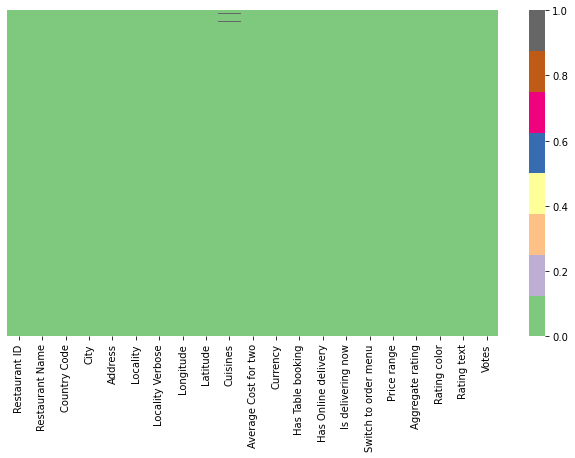

In [11]:
plt.figure(figsize=(11,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap='Accent');

In [12]:
df.rename(columns={'Cuisines':'cucu','Longitude':'long'},inplace=True)



In [13]:
df.rename(columns={'cucu':'Cuisines','long':'Longitude'},inplace=True)


In [14]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [15]:
zomato = pd.merge(df,df1,on='Country Code',how='left')

In [16]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [17]:
countries=zomato['Country'].value_counts().index

In [18]:
values=zomato['Country'].value_counts().values

In [19]:
countries

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [20]:
values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

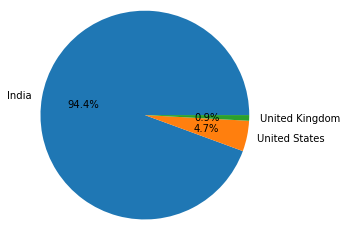

In [21]:
plt.pie(values[0:3],labels=countries[0:3],radius=1.2,autopct='%0.1f%%');

In [22]:
ratings_zom= zomato.groupby(['Aggregate rating','Rating color','Rating text']).size().to_frame().reset_index()

In [23]:
ratings_zom.head()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


In [24]:
ratings_zom.rename(columns={0:'count'},inplace=True)

In [25]:
ratings_zom

,Aggregate rating,Rating color,Rating text,count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [26]:
ratings_zom['Rating color'].unique()

array(['White', 'Red', 'Orange', 'Yellow', 'Green', 'Dark Green'],
      dtype=object)

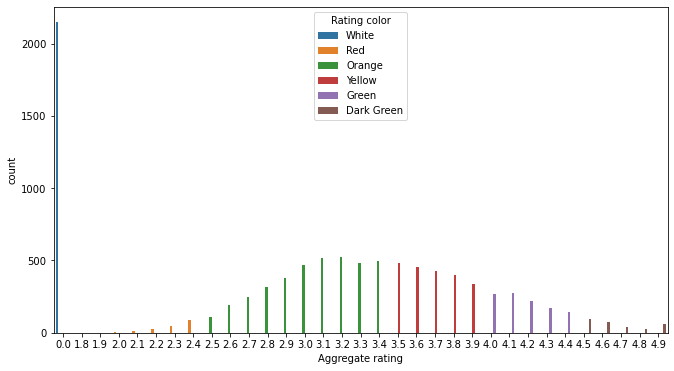

In [27]:
plt.figure(figsize=(11,6))
sns.barplot(x='Aggregate rating',y='count',hue='Rating color',data=ratings_zom);

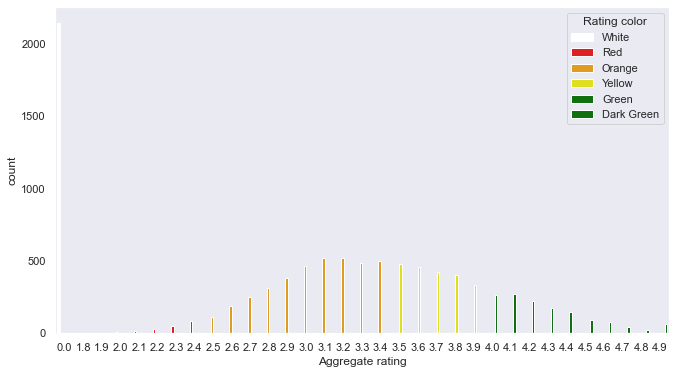

In [28]:
plt.figure(figsize=(11,6))
sns.set_theme(style='dark')
sns.barplot(x='Aggregate rating',y='count',hue='Rating color',data=ratings_zom,palette=['white','red','orange','yellow','green','green']);

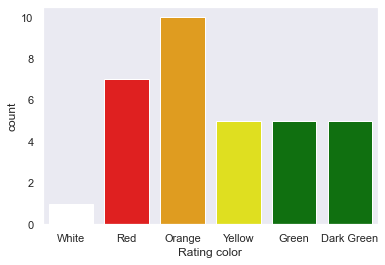

In [31]:
sns.countplot(x='Rating color',data=ratings_zom,palette=['white','red','orange','yellow','green','green']);

## countries with zero rating

In [32]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [35]:
no_ratings_countires = zomato[zomato['Rating color']=='White']

In [51]:
no_ratings_country_names = no_ratings_countires['Country'].value_counts().index

In [52]:
no_ratings_values = no_ratings_countires['Country'].value_counts().values

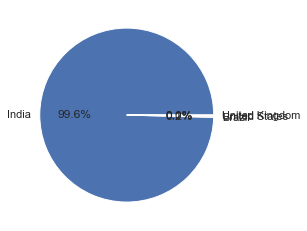

In [56]:
plt.pie(no_ratings_values,labels=no_ratings_country_names,radius=1,autopct='%0.1f%%');

In [83]:
l=no_ratings_countires.groupby(['Country']).size().sort_values(ascending=False).to_frame().reset_index()

In [84]:
l.head()

,Country,0
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


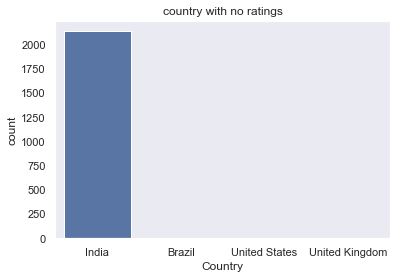

In [89]:
plt.title('country with no ratings')
sns.barplot(x='Country',y=0,data=l)
plt.ylabel('count');

## currency

In [91]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [94]:
zomato.groupby(['Currency','Country']).size().sort_values().to_frame().reset_index()

,Currency,Country,0
0,Dollar($),Canada,4
1,Dollar($),Singapore,20
2,Qatari Rial(QR),Qatar,20
3,Sri Lankan Rupee(LKR),Sri Lanka,20
4,Indonesian Rupiah(IDR),Indonesia,21
5,Botswana Pula(P),Phillipines,22
6,Dollar($),Australia,24
7,Turkish Lira(TL),Turkey,34
8,NewZealand($),New Zealand,40
9,Brazilian Real(R$),Brazil,60


## ONLINE DELIVERIES

In [95]:
zomato.groupby(['Has Online delivery']).size().sort_values().to_frame().reset_index()

,Has Online delivery,0
0,Yes,2451
1,No,7100


In [98]:
zomato[zomato['Has Online delivery']=='No'].groupby(['Country']).size().sort_values().to_frame().reset_index() #change no to yes if required

,Country,0
0,Canada,4
1,Qatar,20
2,Singapore,20
3,Sri Lanka,20
4,Indonesia,21
5,Phillipines,22
6,Australia,24
7,UAE,32
8,Turkey,34
9,New Zealand,40


In [99]:
zomato.groupby(['Has Online delivery','Country']).size().sort_values().to_frame().reset_index()

,Has Online delivery,Country,0
0,No,Canada,4
1,No,Singapore,20
2,No,Sri Lanka,20
3,No,Qatar,20
4,No,Indonesia,21
5,No,Phillipines,22
6,No,Australia,24
7,Yes,UAE,28
8,No,UAE,32
9,No,Turkey,34


In [104]:
city =zomato['City'].value_counts().sort_values(ascending=False).index

In [106]:
city_values= zomato['City'].value_counts().sort_values(ascending=False).values

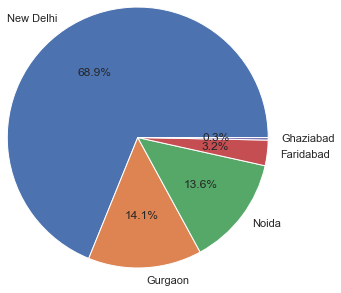

In [115]:
plt.pie(city_values[:5],labels=city[:5],radius=1.5,autopct= '%0.1f%%');

In [151]:
Cusines =zomato['Cuisines'].value_counts().sort_values(ascending=False).reset_index()
Cusines

,index,Cuisines
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
...,...,...
1820,"Cafe, Mexican, Italian, North Indian, Chinese",1
1821,"Continental, Mexican",1
1822,"Continental, Chinese, Italian, Cafe",1
1823,"Hyderabadi, Biryani",1


In [166]:
Cusines_top10 = Cusines.iloc[:11,:]

In [167]:
Cusines_top10

,index,Cuisines
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


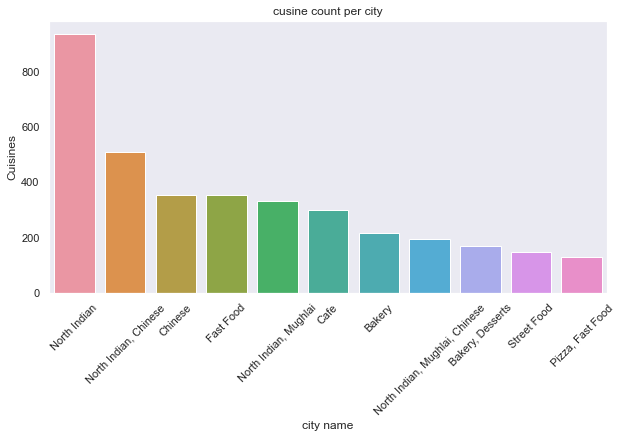

In [171]:
plt.figure(figsize=(10,5))
plt.title('cusine count per city')
sns.barplot(x='index',y='Cuisines',data=Cusines_top10)
plt.xlabel('city name')
plt.xticks(rotation=45);

In [183]:
Cusines_btm10 = Cusines.iloc[-11:,:]

In [184]:
Cusines_btm10

,index,Cuisines
1814,"Cafe, Italian, Continental, Mexican, Mediterra...",1
1815,"Chinese, Thai, Tibetan, Japanese",1
1816,"Desserts, North Indian",1
1817,"American, Italian, Cafe",1
1818,"North Indian, Chinese, Continental, Italian, M...",1
1819,"Pizza, Salad, Finger Food",1
1820,"Cafe, Mexican, Italian, North Indian, Chinese",1
1821,"Continental, Mexican",1
1822,"Continental, Chinese, Italian, Cafe",1
1823,"Hyderabadi, Biryani",1
